In [1]:
import numpy as np


# Load the data from the file using numpy's genfromtxt
# Convert the structured array into a dictionary
data = np.genfromtxt('8_oct.txt', dtype=None, names=True, encoding=None)
data_8 = {name: data[name].tolist() for name in data.dtype.names}

data = np.genfromtxt('9_oct.txt', dtype=None, names=True, encoding=None)
data_9 = {name: data[name].tolist() for name in data.dtype.names}

est_period = 0.33
av_mag = 19
av_amp = 0.5

## Creating fitting lists

In [2]:

# Define the sinusoidal function to fit
def sinusoid(x, amp, a, b, c):
    return amp * np.sin((2 * np.pi / a) * x + b) + c


x = np.array(data_8["mjd"] + data_9["mjd"])
y = np.array(data_8["magnitude"] + data_9["magnitude"])

print(x)
print(y)


[52190.0979167 52190.1048958 52190.1122569 52190.1189468 52190.1262153
 52190.1328935 52190.1415046 52190.1481829 52190.1597454 52190.1664236
 52190.1743171 52190.1809954 52190.1953009 52190.2022222 52190.2094792
 52190.216169  52190.2235532 52190.2302431 52190.2377778 52190.2444676
 52190.2606944 52190.2675347 52190.2748032 52190.2814931 52190.2887731
 52190.3034259 52190.3101157 52190.3232639 52190.3303009 52190.3375926
 52190.344294  52190.3528472 52191.0812616 52191.0882986 52191.0955671
 52191.1095139 52191.1234954 52191.1374537 52191.1441319 52191.1514583
 52191.1581481 52191.1654167 52191.1720949 52191.1793403 52191.1860301
 52191.2035069 52191.2101968 52191.2179977 52191.2246759 52191.2417014
 52191.2485069 52191.2558333 52191.2625116 52191.2747222 52191.2815278
 52191.2954861 52191.3027778 52191.3094444 52191.3216204 52191.3284144
 52191.3356944 52191.3423843]
[19.26638237 19.27899453 19.26091499 19.20663774 19.25884247 19.24348322
 19.27669245 19.25574403 19.2655004  19.24450

## Fit

Fitted parameters: omega = 0.3299992964945861, phi = 0.32608331955485526, offset = 19.016190079179616, amplitude = 0.24531132075350287


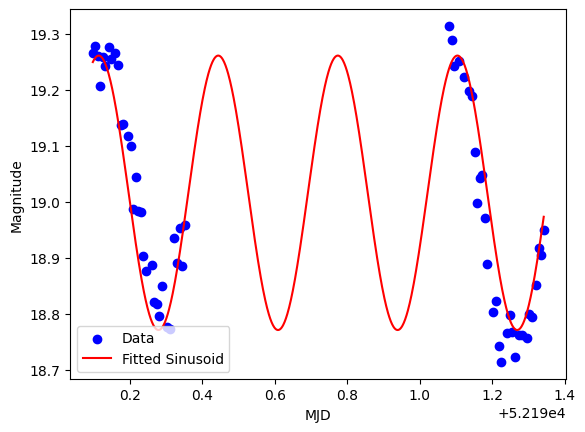

Mean magnitude : 	19.016190079179616
Magnitude variation : 	0.49062264150700574
Period : 		0.3299992964945861 
MSE: 0.004285534801557721
R²: 0.8802297606486083


In [3]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


initial_guess = [av_amp, est_period, 0, av_mag]

params, covariance = curve_fit(sinusoid, x, y, p0=initial_guess, maxfev=100000)

# Extract the optimal parameters
amp_opt, a_opt, b_opt, c_opt = params
print(f"Fitted parameters: omega = {a_opt}, phi = {b_opt}, offset = {c_opt}, amplitude = {amp_opt}")

# Calculate the fitted sinusoid for plotting
x_plot = np.linspace(x[0], x[-1], 1000)
y_fit = sinusoid(x_plot, amp_opt, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x_plot, y_fit, label='Fitted Sinusoid', color='red')
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

print(f'Mean magnitude : \t{c_opt}\nMagnitude variation : \t{amp_opt*2}\nPeriod : \t\t{a_opt} ')

mse = np.mean((sinusoid(x, amp_opt, a_opt, b_opt, c_opt) - y) ** 2)
print(f"MSE: {mse}")



# Calculate R^2
ss_res = np.sum((y - sinusoid(x, amp_opt, a_opt, b_opt, c_opt)) ** 2)  # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared}")

R² = 0.88 => strong fit

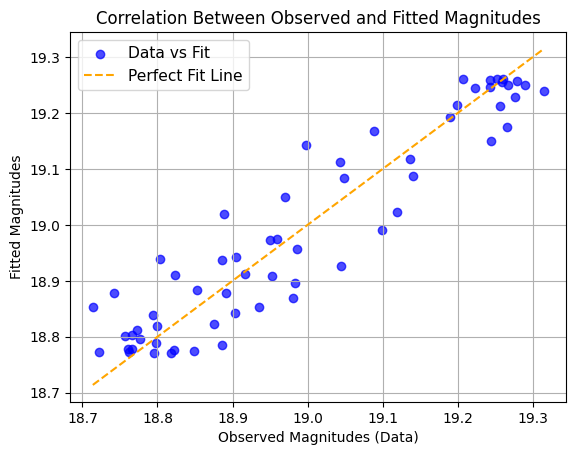

In [4]:
y_fit =  sinusoid(x, amp_opt, a_opt, b_opt, c_opt)

plt.scatter(y, y_fit, color='blue', alpha=0.7, label="Data vs Fit")

# Add a line of perfect correlation
min_val = min(min(y), min(y_fit))
max_val = max(max(y), max(y_fit))
plt.plot([min_val, max_val], [min_val, max_val], color='orange', linestyle='--', label="Perfect Fit Line")

# Add labels, title, and legend
plt.xlabel("Observed Magnitudes (Data)")
plt.ylabel("Fitted Magnitudes")
plt.title("Correlation Between Observed and Fitted Magnitudes")
plt.legend(fontsize=11.2)
plt.grid(True)

# Display R^2 and MSE as text on the plot

# Show the plot
plt.show()